# 信号处理仿真与应用 - 测量和特征提取 - 描述性统计量

## kaiserord

#### Kaiser 窗口 FIR 滤波器设计估计参数

Kaiser 窗口低通滤波器设计

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import kaiserord, firwin, freqz

# 定义采样率
fsamp = 8000

# 定义通带和阻带的频率范围
pass_band = [0, 1000]  # 0 - 1 kHz
stop_band = [1500, 4000]  # 1500 Hz - 4 kHz

# 定义通带纹波和阻带衰减
ripple = 0.05  # 5% 的通带纹波
attenuation = 40  # 40 dB 的阻带衰减


In [32]:
# 计算 Kaiser 窗的参数
delta_f = stop_band[0] - pass_band[1]  # 计算通带到阻带的距离
atten_level = -20 * np.log10(ripple)  # 将通带纹波转换为 dB

# 使用 kaiserord 函数计算所需的阶数和 Kaiser 窗口的参数 beta
n, beta = kaiserord(atten_level, delta_f / (fsamp / 2.0))

# 设计 FIR 低通滤波器
taps = firwin(n, pass_band[1], window=('kaiser', beta), fs=fsamp)  # 移除 nyq 参数

# 计算频率响应
w, h = freqz(taps, 1, 1024, fs=fsamp)

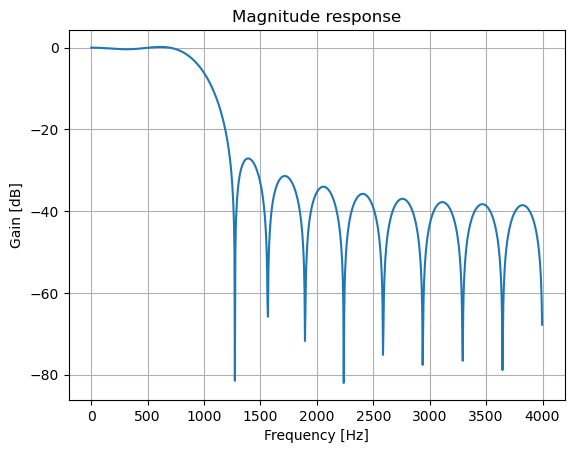

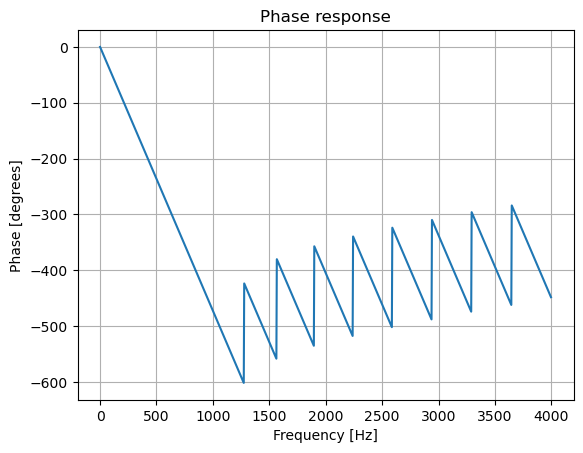

In [33]:
# 绘制幅度响应
plt.figure()
plt.plot(w, 20 * np.log10(abs(h)))
plt.title('Magnitude response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Gain [dB]')
plt.grid()

# 绘制相位响应（转换为度数）
plt.figure()
plt.plot(w, np.degrees(np.unwrap(np.angle(h))))
plt.title('Phase response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase [degrees]')
plt.grid()

plt.show()

Kaiser 窗口带通滤波器设计

In [36]:
# 定义采样率
fsamp = 8000

# 定义希望信号通过的频率范围
fpass = [1300, 2210]

# 定义通带纹波和阻带衰减
ripple = 0.05  # 新的通带纹波值

# 计算 Kaiser 窗的参数
delta_f = min(np.diff(fpass))  # 计算通带和阻带之间的最小间隔
atten_level = -20 * np.log10(ripple)  # 将通带纹波转换为 dB

# 使用 kaiserord 函数计算所需的阶数和 Kaiser 窗口的参数 beta
n, beta = kaiserord(atten_level, delta_f / (fsamp / 2.0))

# 设计 FIR 带通滤波器
taps = firwin(n, fpass, window=('kaiser', beta), pass_zero=False, fs=fsamp)

# 计算频率响应
w, h = freqz(taps, 1, 1024, fs=fsamp)

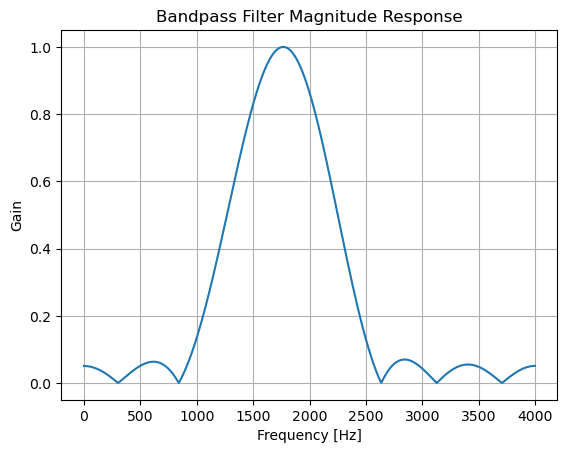

In [37]:
# 绘制幅度响应
plt.plot(w, abs(h))
plt.title('Bandpass Filter Magnitude Response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Gain')
plt.grid()
plt.show()


Kaiser 窗口低通滤波器设计

In [39]:
# 定义采样率
fsamp = 8000

# 定义通带和阻带的频率范围
pass_band = [0, 1500]  
stop_band = [2000, 4000]  

# 定义通带纹波和阻带衰减
ripple = 0.01  
attenuation = 0.1  


In [40]:
# 计算 Kaiser 窗的参数
delta_f = stop_band[0] - pass_band[1]  # 计算通带到阻带的距离
atten_level = -20 * np.log10(ripple)  # 将通带纹波转换为 dB

# 使用 kaiserord 函数计算所需的阶数和 Kaiser 窗口的参数 beta
n, beta = kaiserord(atten_level, delta_f / (fsamp / 2.0))

# 设计 FIR 低通滤波器
taps = firwin(n, pass_band[1], window=('kaiser', beta), fs=fsamp)  # 移除 nyq 参数

# 计算频率响应
w, h = freqz(taps, 1, 1024, fs=fsamp)

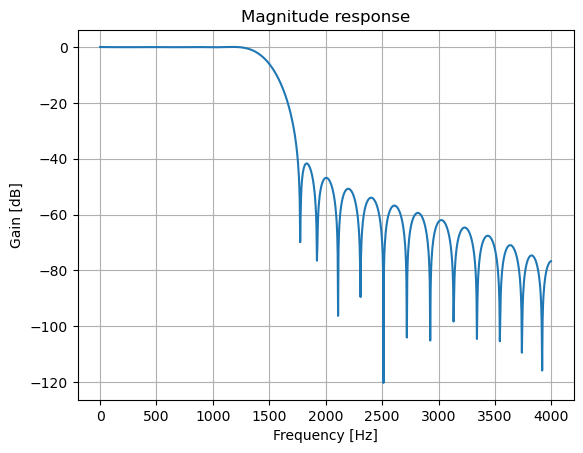

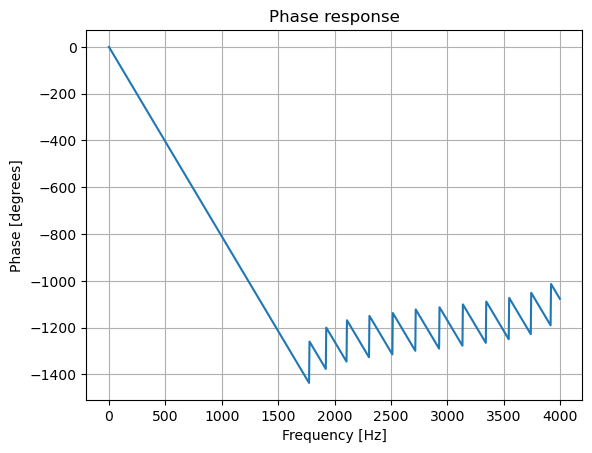

In [41]:
# 绘制幅度响应
plt.figure()
plt.plot(w, 20 * np.log10(abs(h)))
plt.title('Magnitude response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Gain [dB]')
plt.grid()

# 绘制相位响应（转换为度数）
plt.figure()
plt.plot(w, np.degrees(np.unwrap(np.angle(h))))
plt.title('Phase response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase [degrees]')
plt.grid()

plt.show()
